# MLScope: Machine Learning for News Popularity Prediction

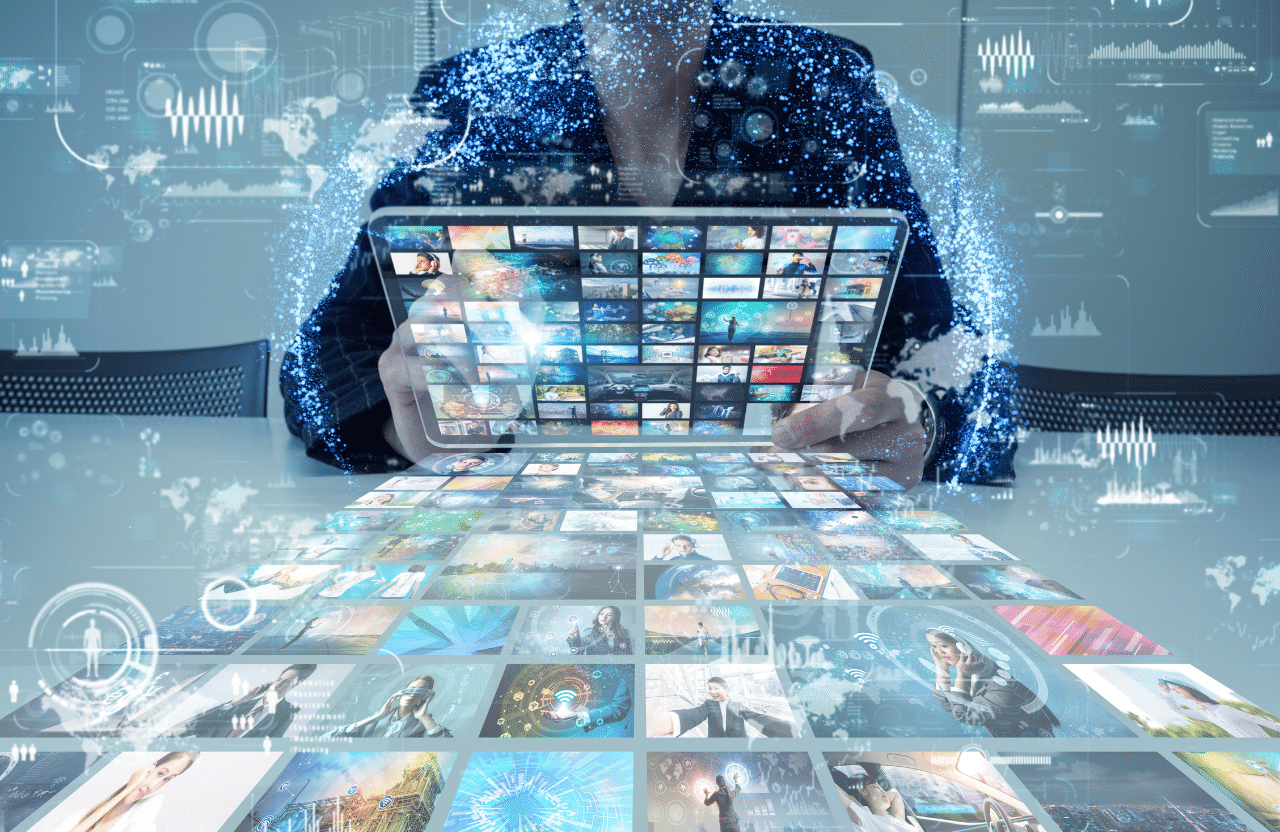

## Table of Contents :
### 1.Introduction
### 2.Goal Of the Project
### 3.Data Story
### 4.Data Preprocessing

### 1.Introduction
  In this research, the Scikit-learn library was employed to develop and refine predictive models for a binary classification task. Specifically, articles were classified as "popular" if their share count exceeded a predefined threshold (D1) and as "unpopular" otherwise. Five machine learning algorithms were tested: 
**Random Forest (RF), Adaptive Boosting (AdaBoost), Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel, K-Nearest Neighbors (KNN), and Naïve Bayes (NB).**
To optimize the performance of these models, a comprehensive grid search was conducted to identify the best hyperparameters, including the number of trees for RF and AdaBoost, the regularization parameter (C) for SVM, and the number of neighbors for KNN. The training data was initially partitioned into 70% for training and 30% for validation through a random holdout method. Once the optimal hyperparameters were determined, the models were trained using the complete training dataset to ensure robust predictions.

### 2.Goal Of the Project
   The goal of this capstone project is to develop and evaluate machine learning models for predicting the popularity of online articles based on a binary classification framework. By utilizing advanced algorithms and optimizing their hyperparameters, the research aims to identify the most effective techniques for classifying articles as "popular" or "unpopular" based on their share counts. This project contributes to the understanding of how predictive modeling can be leveraged in real-world applications, such as digital marketing, content strategy, and audience engagement analytics.

### 3.Data Story
   The dataset utilized in this project was sourced from the UC Irvine Machine Learning Repository, a well-recognized platform for curated datasets. Specifically, the data is the Online News Popularity dataset, which provides detailed attributes of online news articles published by Mashable. It includes metrics such as the number of shares, various content features (e.g., word count, topic category), and social media engagement metrics. The dataset's structure and richness offer a robust foundation for predictive modeling and classification tasks, supporting the development of machine learning models aimed at classifying article popularity.
The dataset can be accessed at the following link: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/datasets?search=OnlineNewsPopularity.csv)


 **Dataset Description**
 
- Number of Entries: The dataset contains 39,644 rows, representing individual articles.
- Number of Features: There are 61 columns in total, including:
- Feature columns: 59 numerical attributes (e.g., content metrics, sentiment scores).
- Target column: The  column, which represents the number of times an article was shared and serves as the target variable for classification
        

### Features/columns:
- The dataset consists of 61 columns, each capturing specific attributes of online news articles.  including the target column representing the number of shares.


#### TOOL USED

## Data Preprocessing

**1. Importing Libraries**

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

**2. Load the dataset**

In [297]:
data = pd.read_csv('OnlineNewsPopularity.csv')


**3.Understand the data structure**

In [299]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,...,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [300]:
data.shape

(39644, 61)

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Dataset Overview

- 39644 rows (entries)
- 61 columns (features)
- float64(59), int64(1), object(1)

In [303]:
# Check unique values for 'aspiration'
print("Unique values in 'url':", data['url'].unique())


Unique values in 'url': ['http://mashable.com/2013/01/07/amazon-instant-video-browser/'
 'http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/'
 'http://mashable.com/2013/01/07/apple-40-billion-app-downloads/' ...
 'http://mashable.com/2014/12/27/son-pays-off-mortgage/'
 'http://mashable.com/2014/12/27/ukraine-blasts/'
 'http://mashable.com/2014/12/27/youtube-channels-2015/']


In [304]:
# Ensure all columns are displayed in the output
pd.set_option('display.max_columns', 60)

# Use describe() as usual
print(data.describe())


          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000  

In [305]:
# Dropping the unnecessary columns (eyeball check!)
data.drop(['url',' timedelta'],axis=1,inplace=True)

 0. url:                           URL of the article (non-predictive)
     1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)

In [307]:
data.columns


Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [308]:
data.shape


(39644, 59)

**4.Handle Missing Data**

In [310]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_share

After checking the missing values in the dataframe, it shows there are no missing values. As no null values, dropna() not used.

**5.Handle Duplicates**

In [313]:
data.duplicated().sum()

0

no duplicates in dataset 

**6.Handle outliers**

In [316]:
data.skew().sort_values(ascending=True)

average_token_length              -4.576012
max_negative_polarity             -3.459747
kw_max_max                        -2.644982
rate_positive_words               -1.423106
global_subjectivity               -1.372689
max_positive_polarity             -0.939756
avg_positive_polarity             -0.724795
abs_title_subjectivity            -0.624149
avg_negative_polarity             -0.551644
num_keywords                      -0.147251
min_negative_polarity             -0.073155
global_sentiment_polarity          0.105457
n_tokens_title                     0.165320
global_rate_positive_words         0.323047
title_sentiment_polarity           0.396109
rate_negative_words                0.407241
kw_min_avg                         0.467976
kw_avg_max                         0.624310
title_subjectivity                 0.816085
LDA_04                             1.173129
LDA_03                             1.238716
LDA_02                             1.311695
data_channel_is_world           

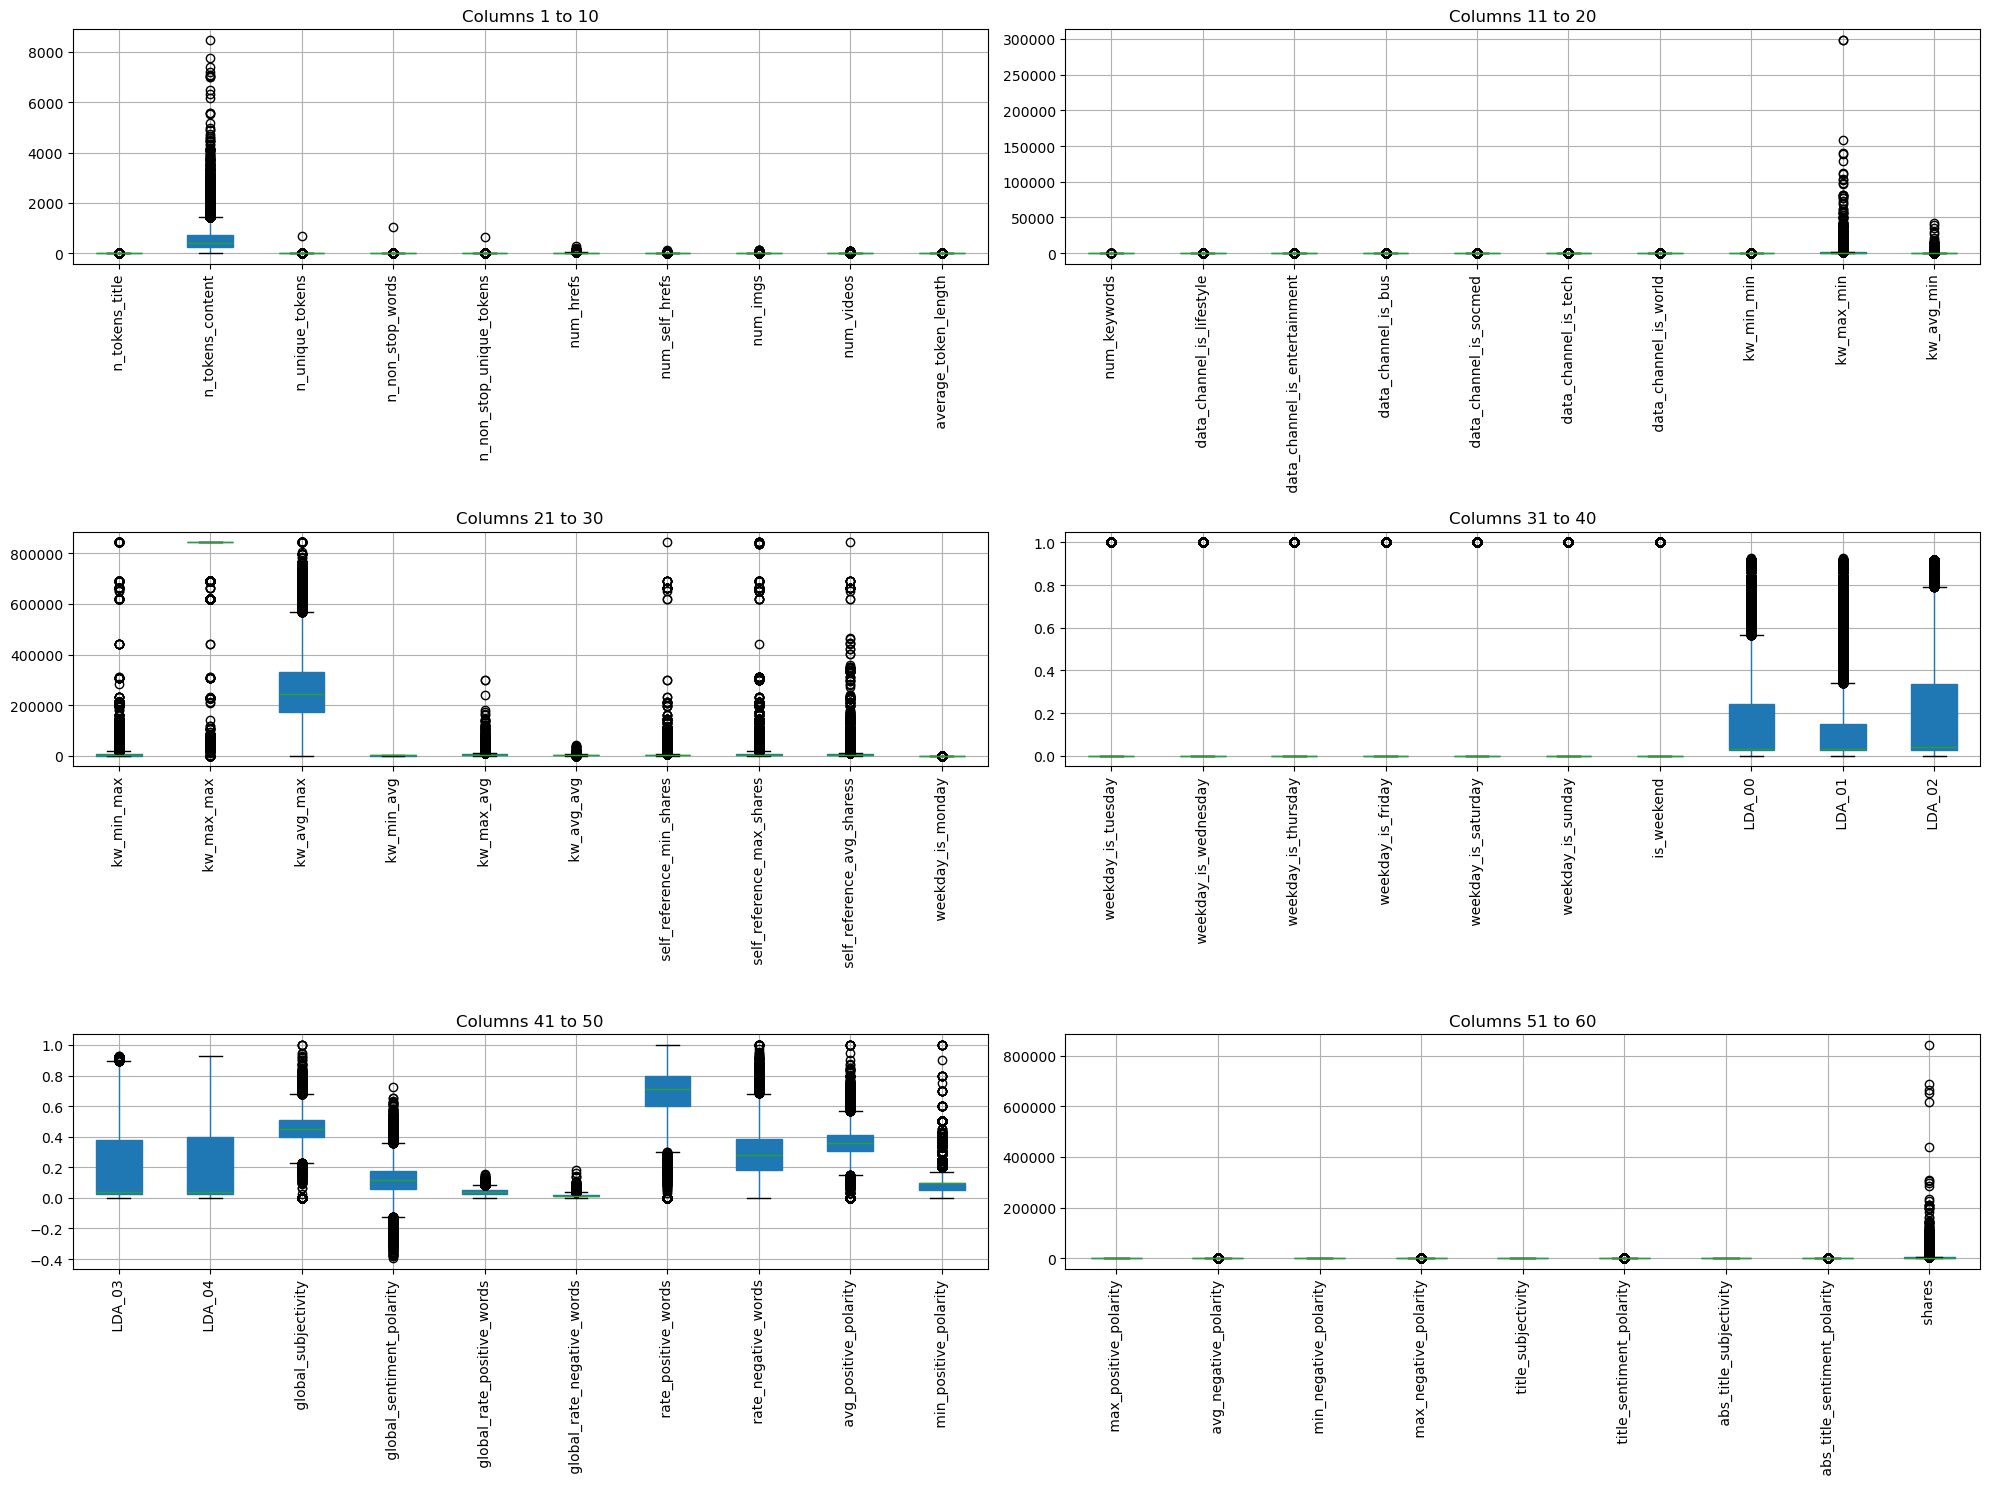

In [317]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define custom colors for box plots
colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightpink', 'lavender', 
          'gold', 'aquamarine', 'khaki', 'peachpuff', 'turquoise']

# Iterate through the columns in batches of 10
for idx, i in enumerate(range(0, 59, 10)):
    # Select the current batch of columns
    batch = data.iloc[:, i:i+10]
    
    # Create box plots for the current batch
    batch.boxplot(ax=axes[idx], patch_artist=True)  # Use patch_artist=True for coloring

    # Apply colors to the boxes using the patches
    for patch, color in zip(axes[idx].artists, colors[:len(batch.columns)]):
        patch.set_facecolor(color)

    # Set the title for each subplot
    axes[idx].set_title(f"Columns {i+1} to {i+10}")
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout for neatness
plt.tight_layout()
plt.show()


### a) Mean and Standard Deviation Method 

In [319]:

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 4


# Create a copy of the dataset to work with
data_cleaned = data.copy()

# Apply outlier removal to all numeric columns, including the target column
for column in data_cleaned.columns:  # Iterate through all columns
    mean = data_cleaned[column].mean()
    std_dev = data_cleaned[column].std()

    # Calculate bounds
    lower_bound = mean - (threshold * std_dev)
    upper_bound = mean + (threshold * std_dev)

    # Filter rows within bounds
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

# Check the cleaned dataset
print("Shape of dataset after outlier removal:", data_cleaned.shape)


Shape of dataset after outlier removal: (30417, 59)


In [320]:
data.shape

(39644, 59)

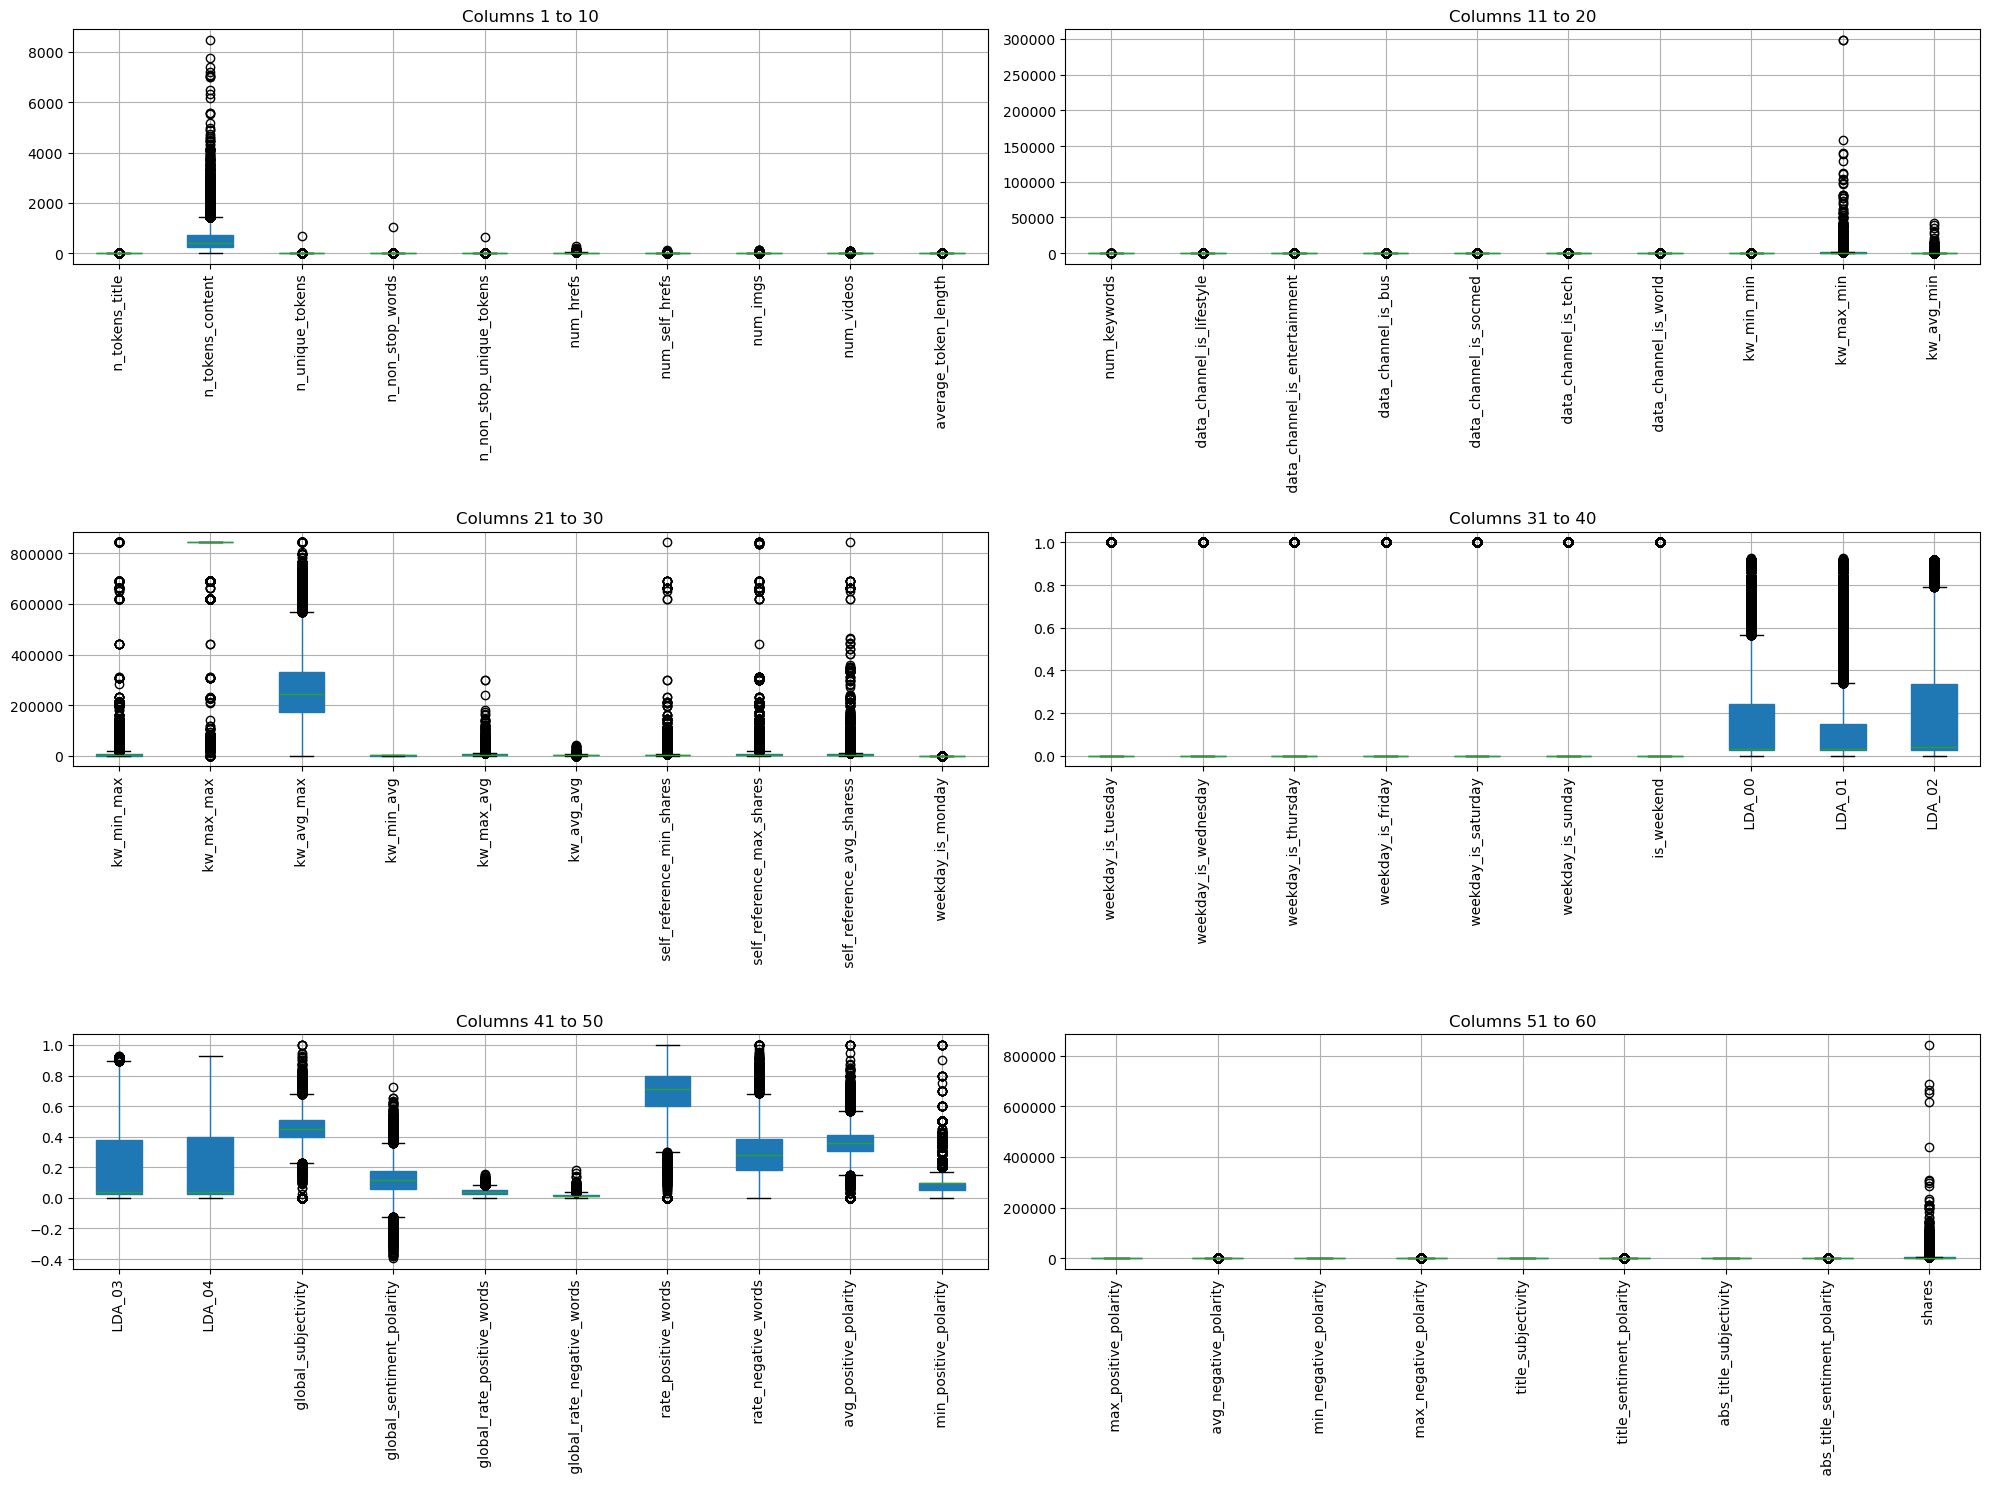

In [321]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define custom colors for box plots
colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightpink', 'lavender', 
          'gold', 'aquamarine', 'khaki', 'peachpuff', 'turquoise']

# Iterate through the columns in batches of 10
for idx, i in enumerate(range(0, 59, 10)):
    # Select the current batch of columns
    batch = data.iloc[:, i:i+10]
    
    # Create box plots for the current batch
    batch.boxplot(ax=axes[idx], patch_artist=True)  # Use patch_artist=True for coloring

    # Apply colors to the boxes using the patches
    for patch, color in zip(axes[idx].artists, colors[:len(batch.columns)]):
        patch.set_facecolor(color)

    # Set the title for each subplot
    axes[idx].set_title(f"Columns {i+1} to {i+10}")
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout for neatness
plt.tight_layout()
plt.show()


### b)IQR Method 

In [323]:
# Calculate IQR for each column in the cleaned dataset
Q1 = data_cleaned.quantile(0.10)  # First quartile
Q3 = data_cleaned.quantile(0.90)  # Third quartile
IQR = Q3 - Q1                     # Interquartile range

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows within bounds
data_cleaned_iqr = data_cleaned[~((data_cleaned < lower_bound) | (data_cleaned > upper_bound)).any(axis=1)]

# Check the shape after additional outlier removal
print("Shape of dataset after IQR outlier removal:", data_cleaned_iqr.shape)


Shape of dataset after IQR outlier removal: (18901, 59)


I used the IQR method because it removes outliers in a way that works well for skewed data and focuses on the middle range of values. It's better at handling extreme values than other methods, helping to clean the data without losing too much useful information.

In [325]:
data_1=data.copy()

In [326]:
data.shape


(39644, 59)

In [327]:
data_1.shape

(39644, 59)

**IQR dierect to data**

In [329]:
# Calculate IQR for each column
Q1 = data_1.quantile(0.10)  # First quartile
Q3 = data_1.quantile(0.90)  # Third quartile
IQR = Q3 - Q1               # Interquartile range

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data within bounds
data_1_cleaned_iqr = data_1[~((data_1 < lower_bound) | (data_1 > upper_bound)).any(axis=1)]

# Check the shape of the cleaned dataset
print("Shape of dataset after applying IQR:", data_cleaned_iqr.shape)


Shape of dataset after applying IQR: (18901, 59)


**Applying the IQR method directly to the original data does seem to have removed a substantial portion of  dataset, which might not be ideal if preserving more data is crucial. Combining the Mean and Standard Deviation method with capping outliers is a great next step as it allows to retain rows while addressing extreme values.**

### Winsorization Method

In [332]:
# Winsorize data_cleaned at the 5th and 95th percentiles
data_winsorized = data_cleaned.clip(lower=data_cleaned.quantile(0.05), upper=data_cleaned.quantile(0.95), axis=1)

# Check the shape of the Winsorized dataset
print("Shape of dataset after Winsorization:", data_winsorized.shape)


Shape of dataset after Winsorization: (30417, 59)


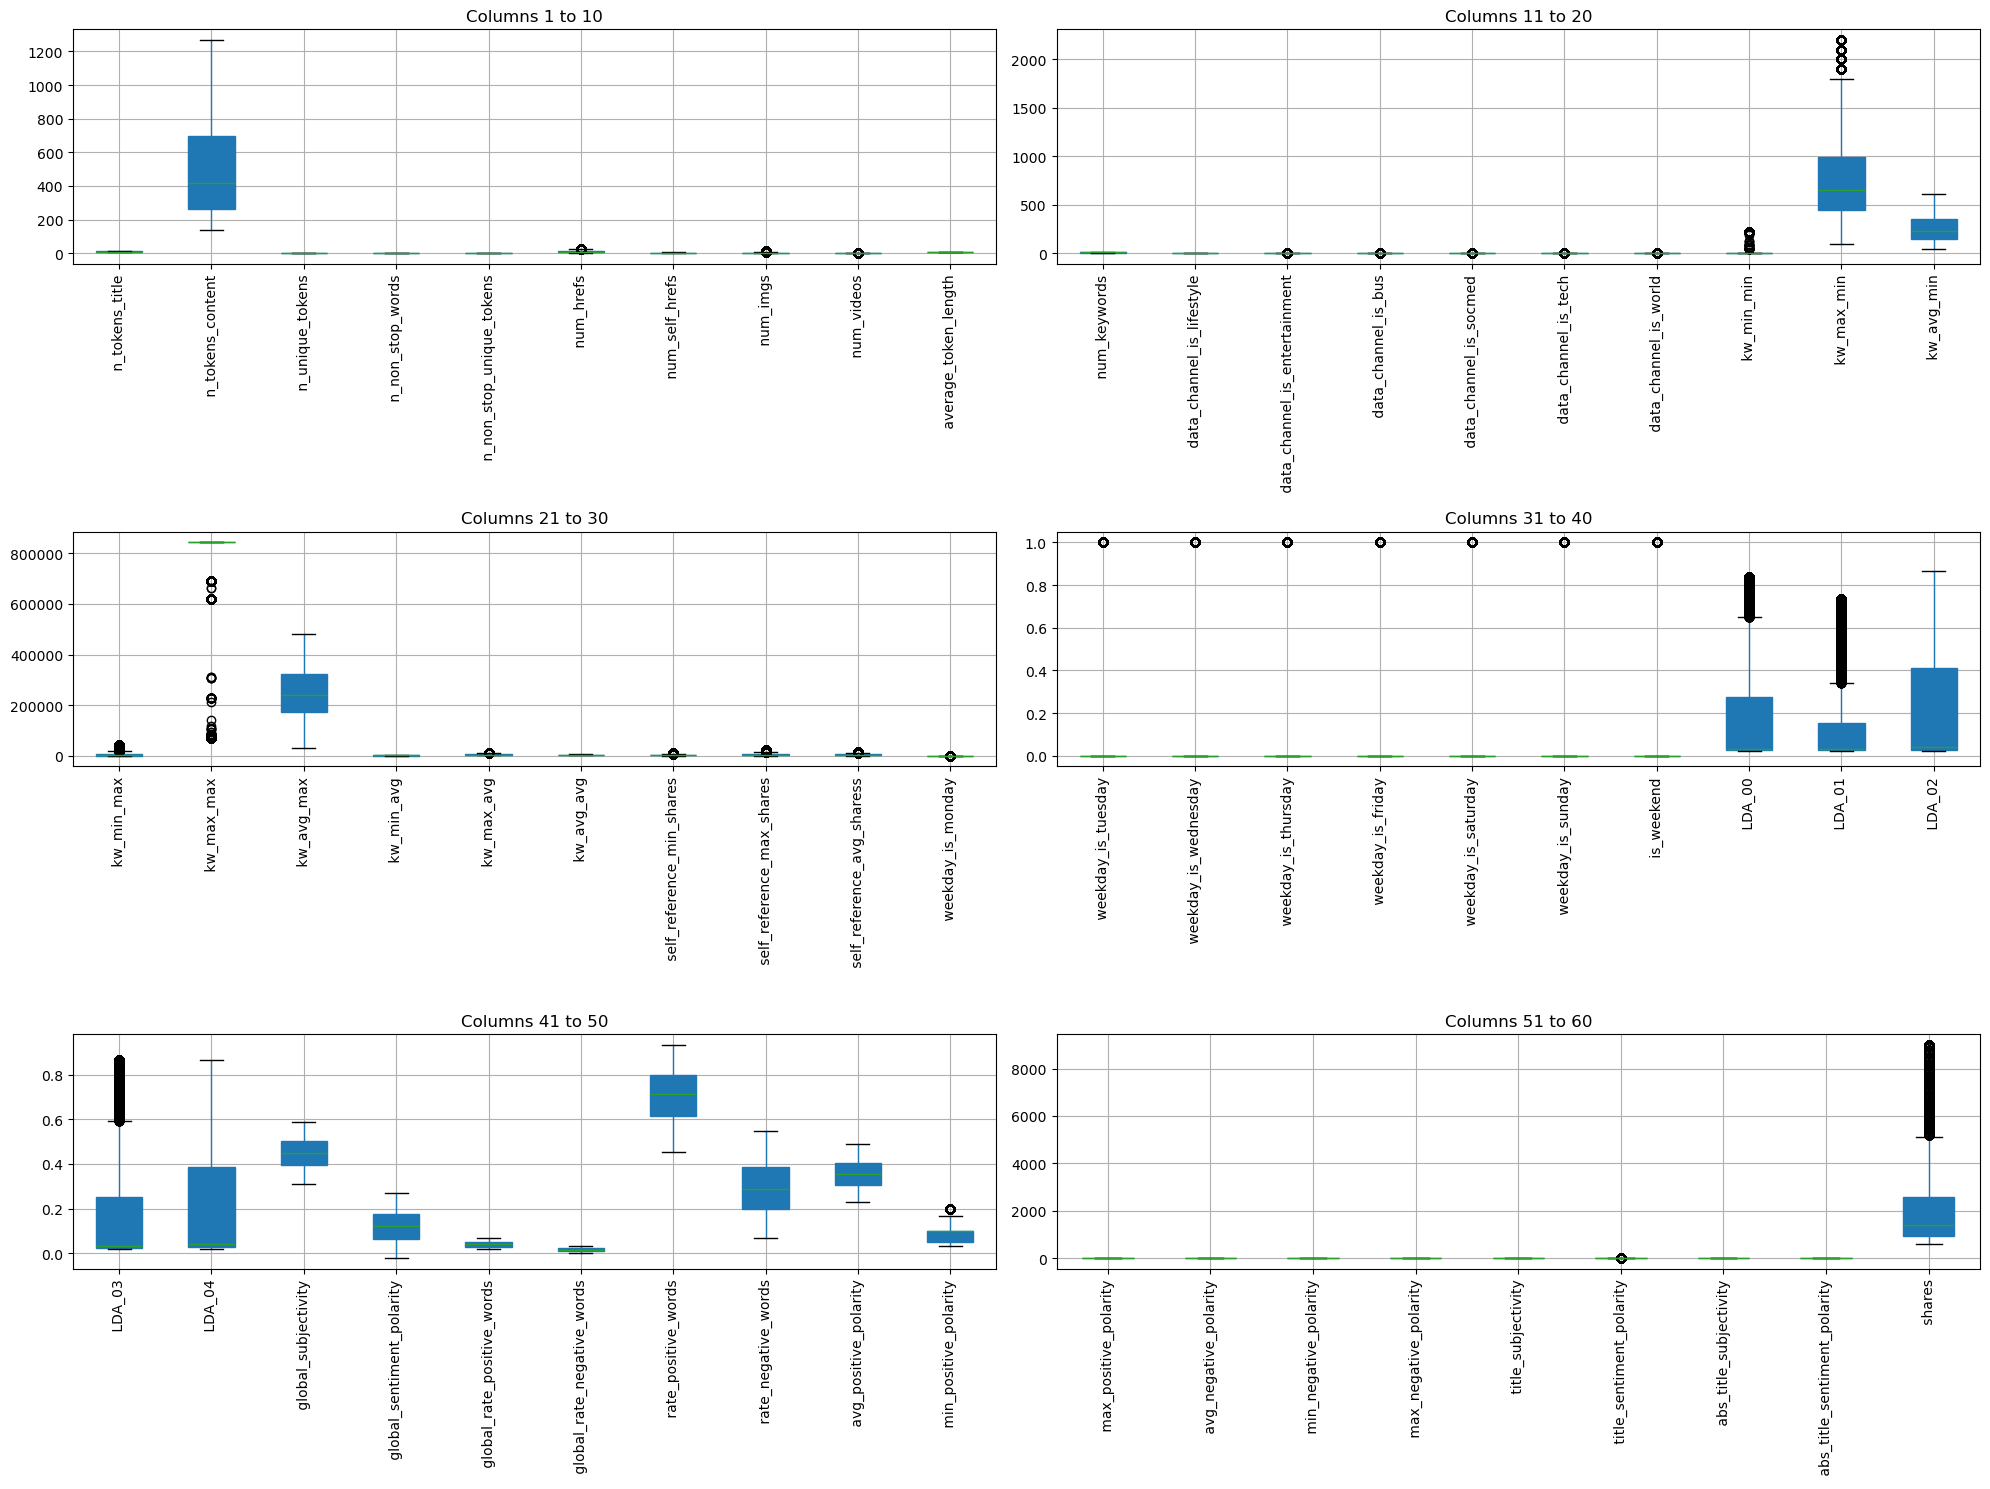

In [333]:
import matplotlib.pyplot as plt

# Define custom colors for box plots
colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightpink', 'lavender', 
          'gold', 'aquamarine', 'khaki', 'peachpuff', 'turquoise']

# Create subplots for visualizing columns in batches (e.g., 10 columns per subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # Adjust rows/cols as needed
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot box plots in batches of 10 columns
for idx, i in enumerate(range(0, len(data_winsorized.columns), 10)):
    # Select batch of 10 columns
    batch = data_winsorized.iloc[:, i:i+10]  
    
    # Create box plot for the batch
    batch.boxplot(ax=axes[idx], patch_artist=True)  # Use patch_artist=True to enable coloring

    # Apply custom colors to the boxes
    for patch, color in zip(axes[idx].artists, colors[:len(batch.columns)]):
        patch.set_facecolor(color)

    # Set subplot title and rotate x-axis labels
    axes[idx].set_title(f"Columns {i+1} to {i+10}")
    axes[idx].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [334]:
# Rename data_winsorized to a new name
new_data = data_winsorized


In [335]:
new_data.shape

(30417, 59)

In [336]:
new_data.skew().sort_values(ascending=True)

kw_max_max                      -2.646511
abs_title_subjectivity          -0.628815
max_negative_polarity           -0.506664
min_negative_polarity           -0.276204
avg_negative_polarity           -0.236835
rate_positive_words             -0.180630
max_positive_polarity           -0.143006
global_subjectivity             -0.022513
data_channel_is_lifestyle        0.000000
n_non_stop_words                 0.000000
num_keywords                     0.012051
global_sentiment_polarity        0.049268
avg_positive_polarity            0.067843
n_tokens_title                   0.070337
n_non_stop_unique_tokens         0.071570
average_token_length             0.097291
kw_avg_max                       0.130770
n_unique_tokens                  0.165166
rate_negative_words              0.180630
global_rate_positive_words       0.260607
global_rate_negative_words       0.419364
kw_min_avg                       0.432445
min_positive_polarity            0.635291
kw_avg_min                       0

**Applying Yeo-Johnson Transformation**

In [338]:
from sklearn.preprocessing import PowerTransformer

# Initialize the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the 'kw_max_max' column
new_data['kw_max_max_transformed'] = pt.fit_transform(new_data[[' kw_max_max']])

# Verify the skewness after the transformation
new_skewness = new_data['kw_max_max_transformed'].skew()
print("Skewness after Yeo-Johnson transformation:", new_skewness)


Skewness after Yeo-Johnson transformation: -1.6367058430669401


In [339]:
#Remove the Original Column kw_max_max
new_data.drop(columns=[' kw_max_max'], inplace=True)


Applying the square root transformation to  positively skewed columns is a smart choice, as it effectively reduces moderate positive skewness by compressing higher values while maintaining the relationship between data points. Here's how you can implement the transformation:


**Square Root Transformation**

In [342]:
positive_skew_columns = [ ' num_hrefs', ' LDA_02', ' abs_title_sentiment_polarity', ' data_channel_is_world', 
' LDA_04', ' kw_max_avg', ' kw_max_min', ' data_channel_is_tech', ' LDA_00', 
' LDA_03', ' weekday_is_wednesday', ' weekday_is_tuesday', ' self_reference_avg_sharess',
' weekday_is_thursday', ' self_reference_max_shares', ' data_channel_is_bus',
' data_channel_is_entertainment', ' num_videos', ' num_imgs', ' weekday_is_monday', 
' LDA_01', ' self_reference_min_shares', ' shares', ' weekday_is_friday', ' kw_min_max', 
' is_weekend', ' kw_min_min', ' weekday_is_sunday', ' weekday_is_saturday', 
' data_channel_is_socmed'
]

# Apply square root transformation to each column
for column in positive_skew_columns:
    # Ensure all values are positive to avoid errors (shift if necessary)
    if (new_data[column] < 0).any():
        new_data[column] = new_data[column] - new_data[column].min() + 1
    new_data[column] = np.sqrt(new_data[column])


In [343]:
new_data.skew().sort_values(ascending=True)

kw_max_max_transformed           -1.636706
 abs_title_subjectivity          -0.628815
 max_negative_polarity           -0.506664
 min_negative_polarity           -0.276204
 avg_negative_polarity           -0.236835
 rate_positive_words             -0.180630
 max_positive_polarity           -0.143006
 global_subjectivity             -0.022513
 n_non_stop_words                 0.000000
 data_channel_is_lifestyle        0.000000
 num_keywords                     0.012051
 global_sentiment_polarity        0.049268
 avg_positive_polarity            0.067843
 n_tokens_title                   0.070337
 n_non_stop_unique_tokens         0.071570
 average_token_length             0.097291
 kw_avg_max                       0.130770
 n_unique_tokens                  0.165166
 rate_negative_words              0.180630
 global_rate_positive_words       0.260607
 self_reference_avg_sharess       0.381516
 global_rate_negative_words       0.419364
 kw_min_avg                       0.432445
 kw_max_min

In [344]:
new_skewness.shape

()

**For Columns with Strong Positive Skew: Apply a logarithmic transformation:**

In [383]:

# List of strongly positively skewed columns
columns_to_transform = [
    ' weekday_is_monday', ' weekday_is_friday', ' is_weekend', ' kw_min_min', 
    ' weekday_is_sunday', ' weekday_is_saturday', ' data_channel_is_socmed'
]

# Apply log1p transformation to each column (handles zero values safely)
for column in columns_to_transform:
    new_data[column] = np.log1p(new_data[column])

# Verify the skewness after transformation
for column in columns_to_transform:
    skewness = new_data[column].skew()
    print(f"Skewness of {column} after log transformation: {skewness}")


Skewness of  weekday_is_monday after log transformation: 1.770490704719703
Skewness of  weekday_is_friday after log transformation: 2.0277100229925127
Skewness of  is_weekend after log transformation: 2.2652313622104603
Skewness of  kw_min_min after log transformation: 1.7910738001083695
Skewness of  weekday_is_sunday after log transformation: 3.50753871551578
Skewness of  weekday_is_saturday after log transformation: 3.7229515715640598
Skewness of  data_channel_is_socmed after log transformation: 3.732907949729636


In [387]:
# List of high-skewed columns
high_skew_columns = [
    ' weekday_is_monday', ' weekday_is_friday', ' is_weekend', ' kw_min_min',
    ' weekday_is_sunday', ' weekday_is_saturday', ' data_channel_is_socmed'
]

# Loop through each column to get unique values
for column in high_skew_columns:
    unique_values = new_data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column ' weekday_is_monday': [0.69314718 0.        ]
Unique values in column ' weekday_is_friday': [0.         0.69314718]
Unique values in column ' is_weekend': [0.         0.69314718]
Unique values in column ' kw_min_min': [0.88137359 2.7599244  1.23822632 2.52136097 2.47340581 2.39789527
 2.07944154 2.20411829 2.0612336  2.31896534 2.16115352 2.6836333
 2.02253231 0.69314718 2.21761013 2.33996098 2.03251365 2.72443568
 2.35012047]
Unique values in column ' weekday_is_sunday': [0.         0.69314718]
Unique values in column ' weekday_is_saturday': [0.         0.69314718]
Unique values in column ' data_channel_is_socmed': [0.         0.69314718]


These columns are binary or numerical features, some with high skewness, which may need transformations depending on their relevance to the target variable.